In [11]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../python')
import plot_info
import json
from IPython.core.display import display, HTML
import copy
import pprint
import re

In [2]:
basename='../data/airfoils_qmc_{}.json'

In [3]:
functionals = ['Drag', 'Lift']

data = {}

for functional in functionals:
    data[functional] = []
    
    filename = basename.format(functional.lower())
    
    with open(filename, 'r') as f:
        json_content = json.load(f)
        
        data[functional] = copy.deepcopy(json_content)

[64, 128, 256, 32]


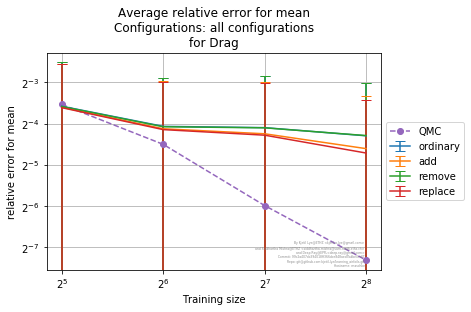

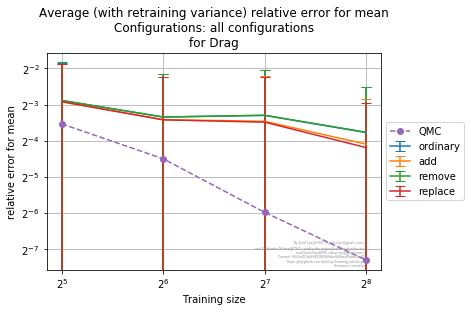

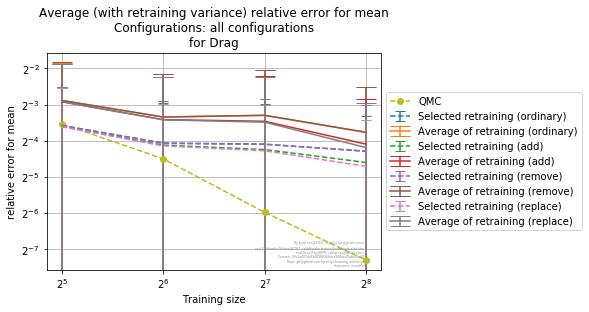

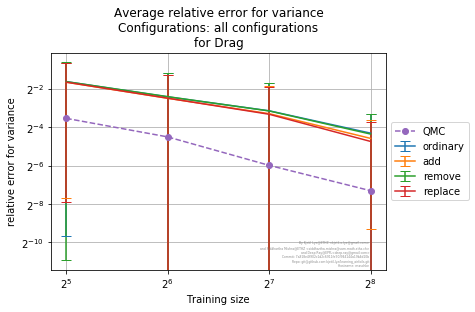

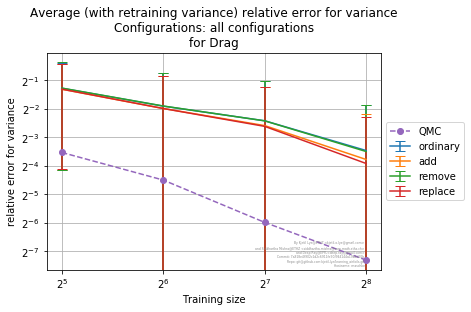

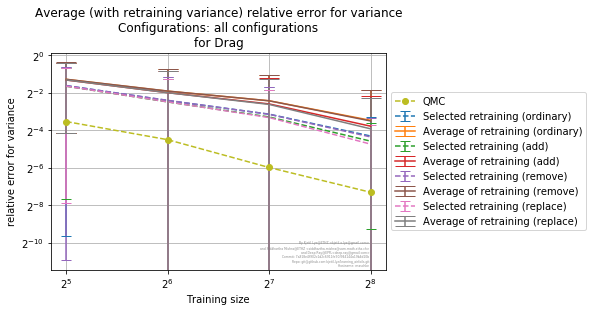

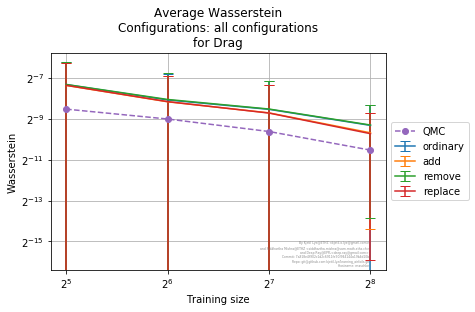

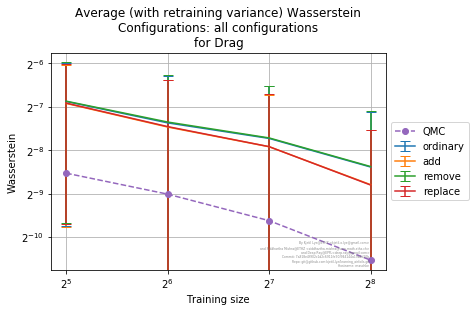

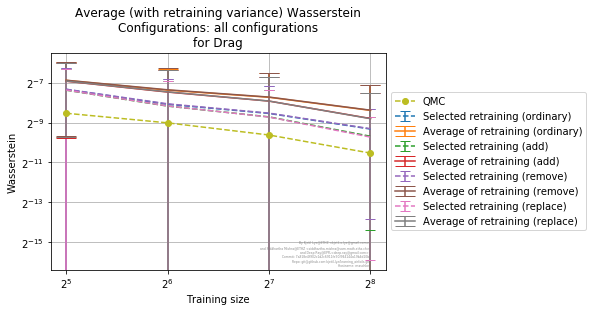

/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive valu

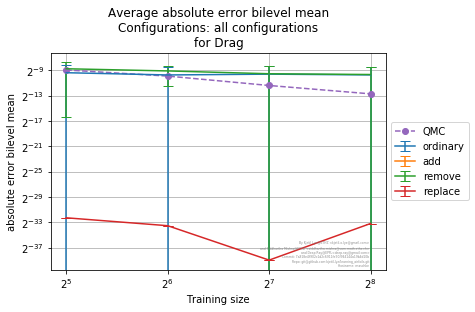

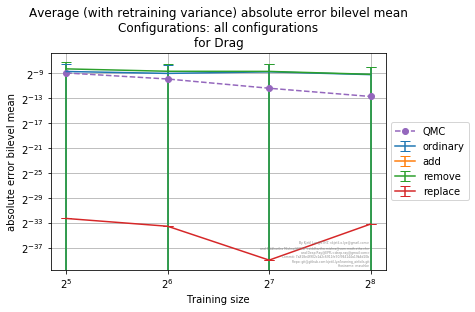

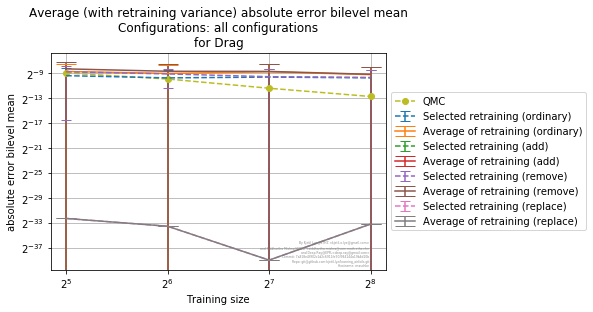

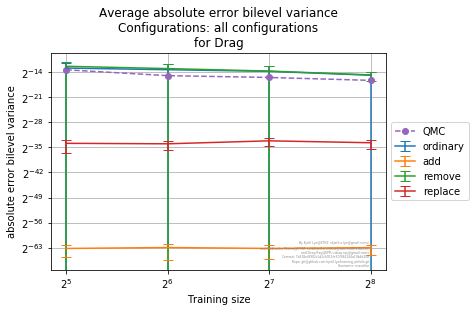

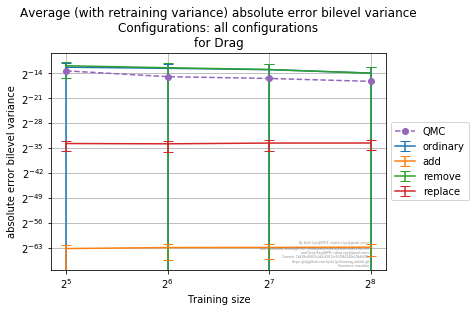

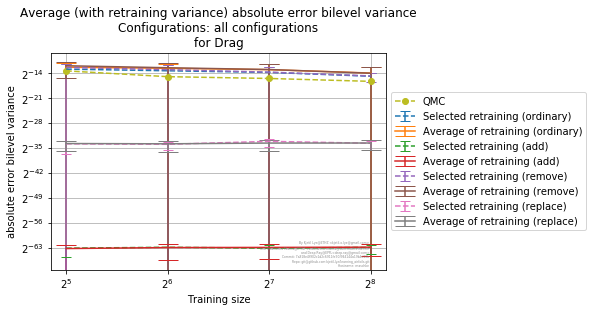

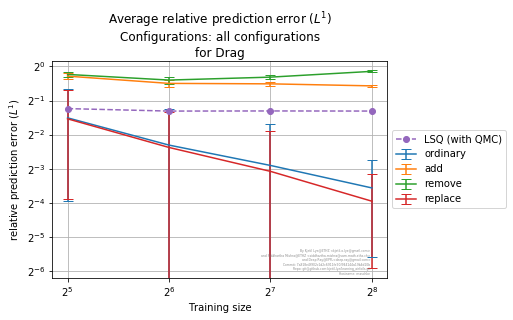

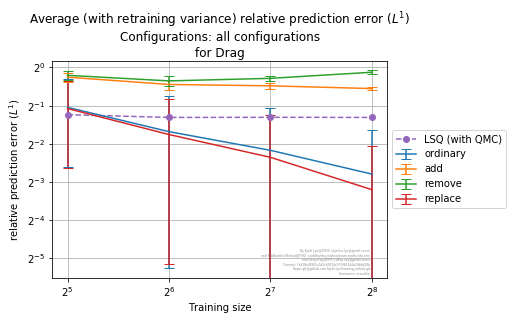

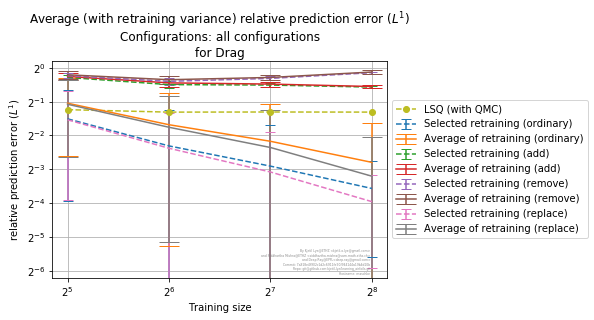

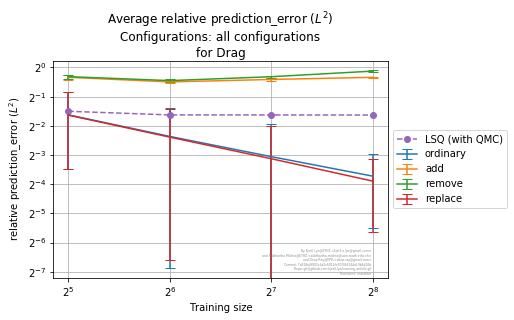

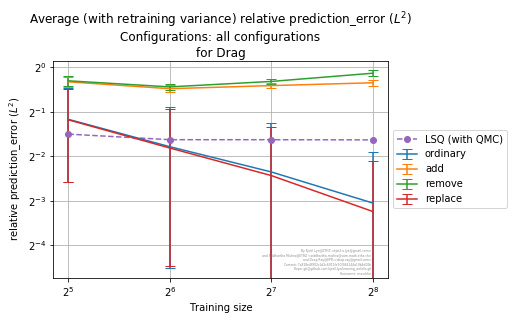

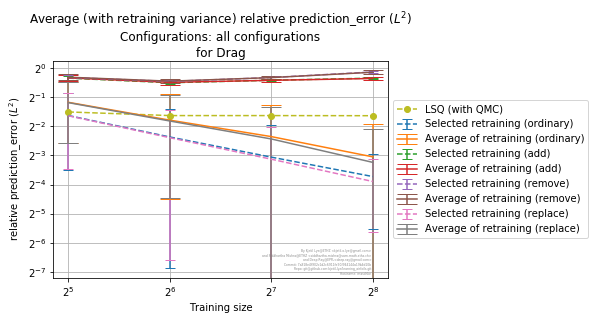

[64, 128, 256, 32]


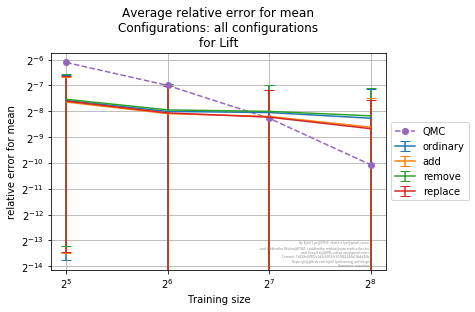

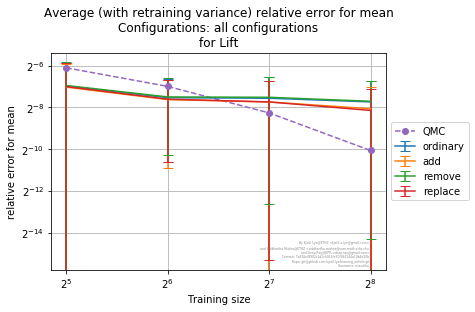

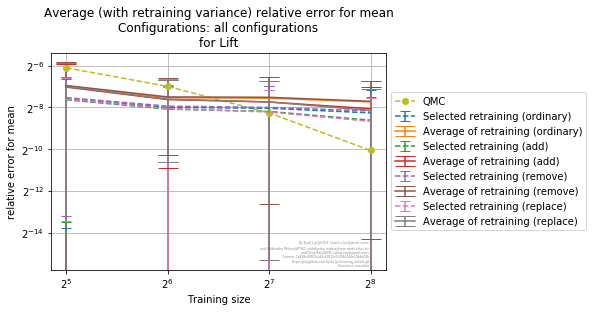

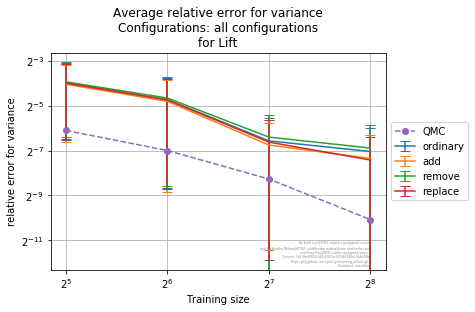

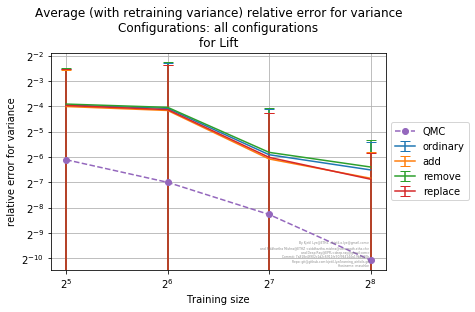

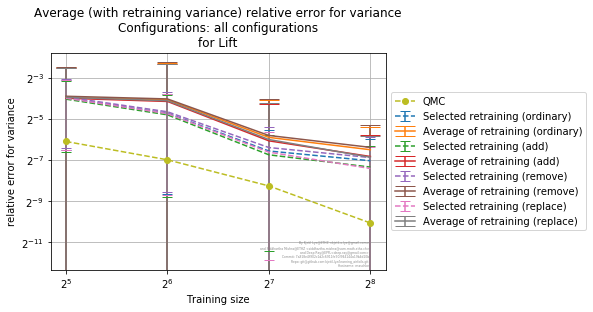

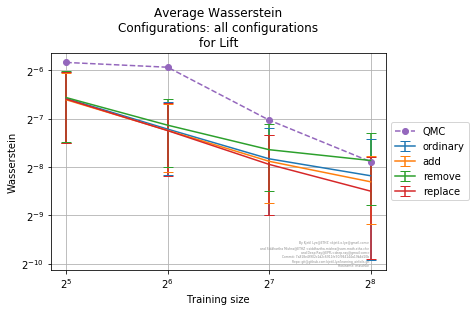

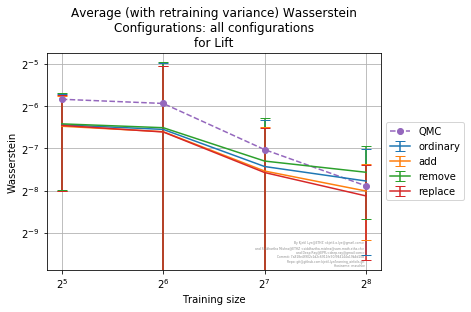

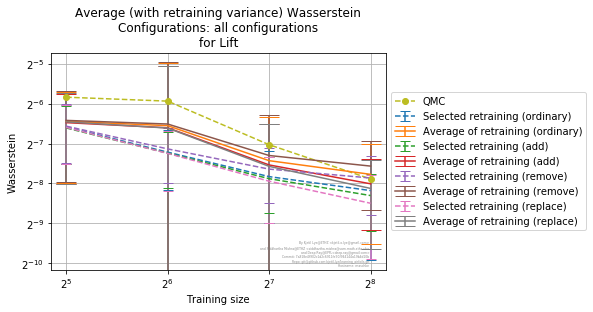

/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive valu

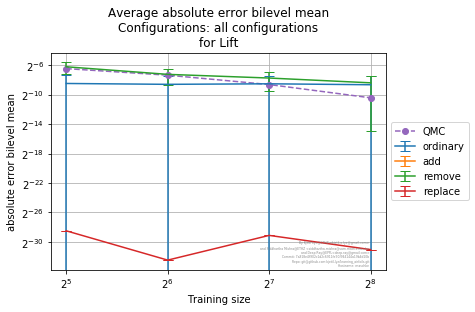

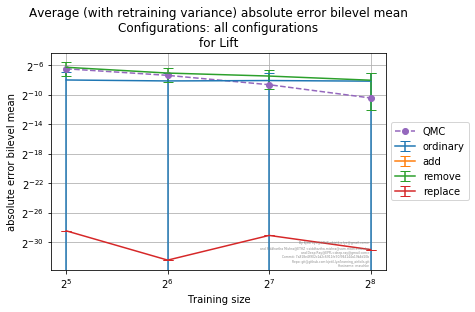

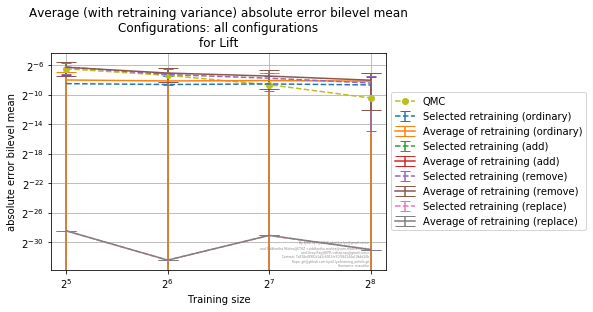

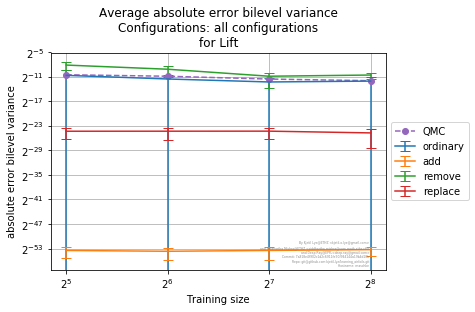

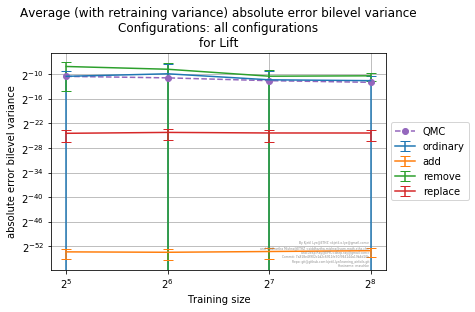

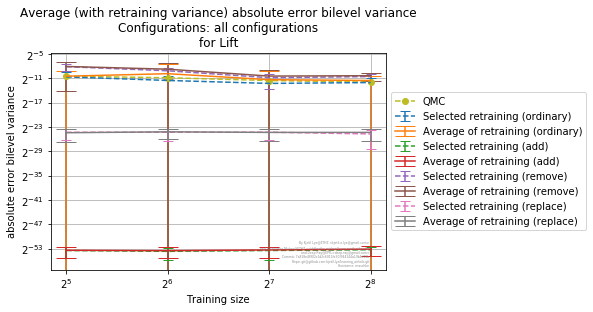

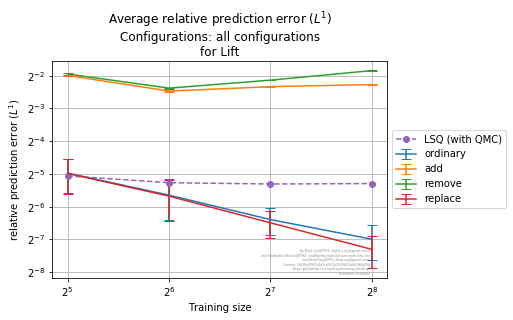

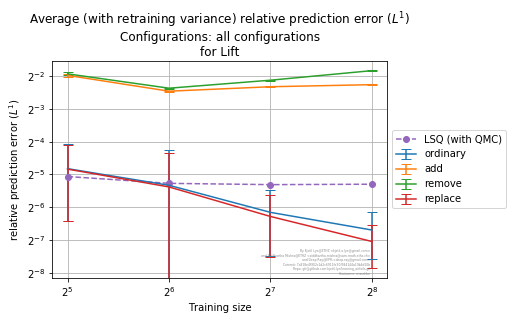

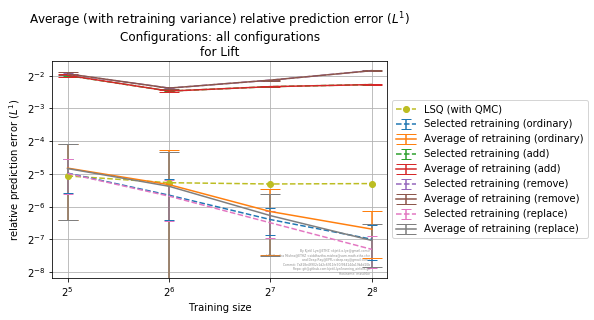

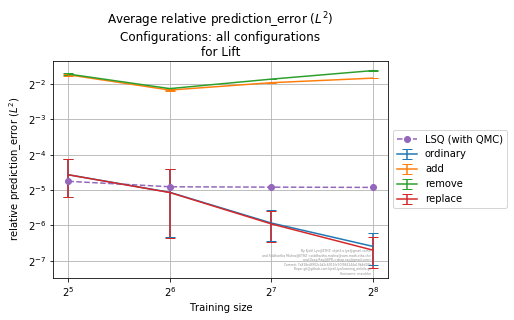

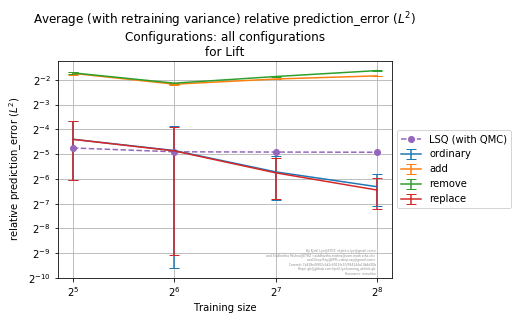

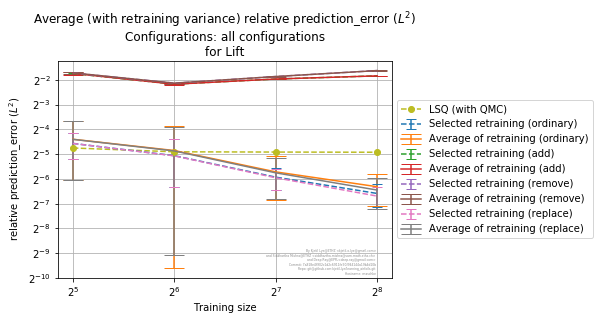

In [4]:
def get_dict_path(dictionary, path):
    split = path.split('.')
    for s in split:
        dictionary = dictionary[s]
    return dictionary

# As a function of training size
def plot_as_training_size(functional, data, title="all configurations"):
    train_sizes = []
    
    for configuration in data['configurations']:
        train_size = int(configuration['settings']['train_size'])
        if train_size not in train_sizes:
            train_sizes.append(train_size)
    print(train_sizes) 
    train_sizes = sorted(train_sizes)
    
    data_source_names = data['configurations'][0]['results']['best_network']['algorithms'].keys()
    for k in data_source_names:
        if re.match(r'^[Q]?MC_from_data$', k):
            data_source = k
            break
            
    sampling_method = re.search(r'(^[Q]?MC)_from_data$', data_source).group(1)
    names = {
        "mean_error_relative" : "relative error for mean",
        "var_error_relative" : "relative error for variance",
        "wasserstein_error_cut" : "Wasserstein",
        "mean_bilevel_error": "absolute error bilevel mean",
        "var_bilevel_error" :"absolute error bilevel variance",
        "prediction_l1_relative": 'relative prediction error ($L^1$)',
        "prediction_l2_relative" : 'relative prediction_error ($L^2$)'
    }
    
    competitor_keys = {
        "mean_error_relative" : "results.best_network.base_sampling_error.mean_error_relative",
        "var_error_relative" : "results.best_network.base_sampling_error.mean_error_relative",
        "wasserstein_error_cut" : "results.best_network.base_sampling_error.wasserstein_error_cut",
        "mean_bilevel_error": "results.best_network.base_sampling_error.mean_error",
        "var_bilevel_error" :"results.best_network.base_sampling_error.var_error",
        "prediction_l1_relative": 'results.best_network.algorithms.{data_source}.lsq.ordinary.prediction_l1_relative'.format(data_source=data_source),
        "prediction_l2_relative" :  'results.best_network.algorithms.{data_source}.lsq.ordinary.prediction_l2_relative'.format(data_source=data_source),
    }
    
    competitor_names = {
        "mean_error_relative" : sampling_method,
        "var_error_relative" : sampling_method,
        "wasserstein_error_cut" : sampling_method,
        "mean_bilevel_error": sampling_method,
        "var_bilevel_error" : sampling_method,
        "prediction_l1_relative": 'LSQ (with {})'.format(sampling_method),
        "prediction_l2_relative" : 'LSQ (with {})'.format(sampling_method),
    }
    
    errors = {
    }
    
    
    
    errors_var = {}
    errors_min = {}
    
    errors_max = {}
    
    errors_retraining = {}
    errors_retraining_var = {}
    errors_min = {}
    
    errors_max = {}
    competitor = {}
    for k in names.keys():
        errors[k] = np.zeros(len(train_sizes))
        errors_var[k]  = np.zeros(len(train_sizes))
        errors_max[k]  = np.zeros(len(train_sizes))
        errors_min[k]  = np.zeros(len(train_sizes))
        errors_retraining[k]  = np.zeros(len(train_sizes))
        errors_retraining_var[k]  = np.zeros(len(train_sizes))
        competitor[k]  = np.zeros(len(train_sizes))
        
    
    for error in errors.keys():
        tactics=['ordinary', 'add', 'remove', 'replace']
        for t, tactic in enumerate(tactics):
            for (n, train_size) in enumerate(train_sizes):
                errors_local = []
                for configuration in data['configurations']:
                    ts = int(configuration['settings']['train_size'])
                    if ts == train_size:
                        errors_local.append(configuration['results']['best_network']['algorithms'][data_source]['ml'][tactic][error])
                        competitor[error][n] = get_dict_path(configuration, competitor_keys[error])
                        
                
                            
                errors[error][n] = np.mean(errors_local)
                errors_var[error][n] = np.var(errors_local)
                errors_min[error][n] = np.amin(errors_local)
                errors_max[error][n] = np.amax(errors_local)
                
                
                
                errors_local = []
                for configuration in data['configurations']:
                    ts = int(configuration['settings']['train_size'])
                    if ts == train_size:
                        retrainings = configuration['results']['retrainings'].keys()
                        for retraining in retrainings:
                            errors_local.append(configuration['results']['retrainings'][retraining]['algorithms'][data_source]['ml'][tactic][error])
                errors_retraining[error][n] = np.mean(errors_local)
                errors_retraining_var[error][n] = np.var(errors_local)
                
                
                
            plt.figure(0)
            
            
            p = plt.errorbar(train_sizes, errors[error], yerr=np.sqrt(errors_var[error]), label=tactic,
                            solid_capstyle='projecting', capsize=5)
            plt.figure(t+1)
            plt.errorbar(train_sizes, errors[error], yerr=np.sqrt(errors_var[error]),
                            solid_capstyle='projecting', capsize=5, label='Machine learning')
            
            
            plt.figure(len(tactics)+1)
            p = plt.errorbar(train_sizes, errors_retraining[error], yerr=np.sqrt(errors_retraining_var[error]), label=tactic,
                            solid_capstyle='projecting', capsize=5)
            
            plt.figure(len(tactics)+1+t+1)
            plt.errorbar(train_sizes, errors_retraining[error], yerr=np.sqrt(errors_retraining_var[error]),
                            solid_capstyle='projecting', capsize=5, label='Machine learning')
            
            
            
            plt.figure(2*(len(tactics)+1))
            p = plt.errorbar(train_sizes, errors[error], yerr=np.sqrt(errors_var[error]), \
                             label='Selected retraining ({})'.format(tactic), ls='--',
                            solid_capstyle='projecting', capsize=5)
            
            p = plt.errorbar(train_sizes, errors_retraining[error], 
                             yerr=np.sqrt(errors_retraining_var[error]), 
                             label='Average of retraining ({})'.format(tactic),
                            solid_capstyle='projecting', capsize=10)
            
            
            
            plt.figure(2*(len(tactics)+1)+t+1)
            p = plt.errorbar(train_sizes, errors[error], yerr=np.sqrt(errors_var[error]), \
                             label='Selected retraining', ls='--',
                            solid_capstyle='projecting', capsize=5)
            
            p = plt.errorbar(train_sizes, errors_retraining[error], 
                             yerr=np.sqrt(errors_retraining_var[error]), 
                             label='Average of retraining', 
                            solid_capstyle='projecting', capsize=10)

            
            #plt.loglog(train_sizes, errors_min[error], '.--', label='{} minimum'.format(tactic), color=p[0].get_color())
            #plt.loglog(train_sizes, errors_max[error], '--', label='{} maximum'.format(tactic), color=p[0].get_color())
        plt.figure(0)
        
        plt.gca().set_xscale("log", nonposx='clip', basex=2)
        plt.gca().set_yscale("log", nonposy='clip', basey=2)
        plt.title('Average {}\nConfigurations: {}\nfor {}'.format(names[error], title, functional))
        plt.xlabel("Training size")
        plt.ylabel(names[error])
        plt.grid(True)
        #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
        plot_info.savePlot('combined_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        
        plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
        plot_info.legendLeft()
        plot_info.savePlot('combined_with_compare_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        plt.figure(len(tactics)+1)
        
        plt.gca().set_xscale("log", nonposx='clip', basex=2)
        plt.gca().set_yscale("log", nonposy='clip', basey=2)
        plt.title('Average (with retraining variance) {}\nConfigurations: {}\nfor {}'.format(names[error], title, functional))
        plt.xlabel("Training size")
        plt.ylabel(names[error])
        plt.grid(True)
        #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
        plot_info.savePlot('combined_retraining_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        
        plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
        plot_info.legendLeft()
        plot_info.savePlot('combined_retraining_with_compare_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        
        
        
        
        
        
        plt.figure(2*(len(tactics)+1))
        
        plt.gca().set_xscale("log", nonposx='clip', basex=2)
        plt.gca().set_yscale("log", nonposy='clip', basey=2)
        plt.title('Average (with retraining variance) {}\nConfigurations: {}\nfor {}'.format(names[error], title, functional))
        plt.xlabel("Training size")
        plt.ylabel(names[error])
        plt.grid(True)
        #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
        plot_info.savePlot('combined_retraining_best_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        
        plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
        plot_info.legendLeft()
        plot_info.savePlot('combined_retraining_best_with_compare_{functional}_{error}_{title}_convergence_training_size'.format(functional=functional,
                                                                                      error=error, title=title))
        
        
        
        for t, tactic in enumerate(tactics):
            plt.figure(t+1)
            plot_info.legendLeft()
            plt.gca().set_xscale("log", nonposx='clip', basex=2)
            plt.gca().set_yscale("log", nonposy='clip', basey=2)
            plt.title('Average {}\nConfigurations: {}\n for {}\n(Using "{tactic}" to deal with training samples)'.format(names[error], title, functional,
                                                                                                          tactic=tactic))
            plt.xlabel("Training size")
            plt.ylabel(names[error])
            plt.grid(True)
            #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
            plot_info.savePlot('combined_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            
            plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
            plot_info.legendLeft()
            plot_info.savePlot('combined_with_compare_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            plt.close(t+1)
            
            
            plt.figure(len(tactics)+1+t+1)
            plot_info.legendLeft()
            plt.gca().set_xscale("log", nonposx='clip', basex=2)
            plt.gca().set_yscale("log", nonposy='clip', basey=2)
            plt.title('Average (with retraining) {}\nConfigurations: {}\n for {}\n(Using "{tactic}" to deal with training samples)'.format(names[error], title, functional,
                                                                                                          tactic=tactic))
            plt.xlabel("Training size")
            plt.ylabel(names[error])
            plt.grid(True)
            #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
            plot_info.savePlot('combined_retraining_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            
            plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
            plot_info.legendLeft()
            plot_info.savePlot('combined_retraining_with_compare_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            
            plt.close(len(tactics)+1+t+1)
            
            
            
            
            
            plt.figure(2*(len(tactics)+1)+t+1)
            plot_info.legendLeft()
            plt.gca().set_xscale("log", nonposx='clip', basex=2)
            plt.gca().set_yscale("log", nonposy='clip', basey=2)
            plt.title('Average (with retraining) {}\nConfigurations: {}\n for {}\n(Using "{tactic}" to deal with training samples)'.format(names[error], title, functional,
                                                                                                          tactic=tactic))
            plt.xlabel("Training size")
            plot_info.legendLeft()
            plt.ylabel(names[error])
            plt.grid(True)
            #plt.ylim([max(min(errors[error]-np.sqrt(errors_var[error])),0), max(errors[error]+np.sqrt(errors_var[error]))])
            plot_info.savePlot('combined_retraining_best_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            
            plt.loglog(train_sizes, competitor[error], '--o', label=competitor_names[error], basex=2, basey=2)
            
            plot_info.savePlot('combined_retraining_best_with_compare_{functional}_{error}_{title}_{tactic}_convergence_training_size'.format(functional=functional,
                                                                                              error=error, title=title,
                                                                                                                   tactic=tactic))
            
            plt.close(2*(len(tactics)+1)+t+1)
        plt.show()
plot_as_training_size('Drag', data['Drag'])
plot_as_training_size('Lift', data['Lift'])     

In [5]:
print(data['Drag']['configurations'][0]['results']['best_network'].keys())

dict_keys(['algorithms', 'train_size', 'base_sampling_error', 'reference_sampling_error', 'prediction_error'])


In [6]:
def filter_configs(data, excludes={}, onlys={}, test_functions = []):
    data_copy = {}
    
    for k in data.keys():
        if k != 'configurations':
            data_copy[k] = copy.deepcopy(data[k])
    data_copy['configurations'] = []
    print(len(data['configurations']))
    for config in data['configurations']:
        keep = True
        for exclude_path in excludes.keys():
            split = exclude[0].split('.')
            value = config
            for k in split:
                value = value[k]
            excluded_values = excludes[exclude_path]
            
            for excluded_value in excluded_values:
                if value == excluded_value:
                    keep = False
        if not keep:
            continue
            
        for only_path in onlys.keys():
            split = only_path[0].split('.')
            value = config
            for k in split:
                value = value[k]
            only_values = onlys[only_path]
            
            equal_to_one = False
            for only_value in only_values:
                if value == only_value:
                    equal_to_one = True
            if not equal_to_one:
                keep = False
        
        if not keep:
            continue
        
        
        for test_function in test_functions:
            if not test_function(config):
                keep = False
                
        if not keep:
            continue
        
            
        data_copy['configurations'].append(copy.deepcopy(config))
    print(len(data_copy['configurations']))
    return data_copy

In [7]:
def has_regularization(config):
    return config['settings']['regularizer'] is not None and config['settings']['regularizer'] != "None"

def get_regularization(config):
    return config['settings']['regularizer']
def get_optimizer(config):
    return config['settings']['optimizer']

def get_loss(config):
    return config['settings']['loss']

def only_adam_and_no_regularization_for_mse(config):
    return get_optimizer(config) == 'Adam' and (get_loss(config) == 'mean_absolute_error' or not has_regularization(config))

def only_adam_and_no_regularization_for_mse_and_reg_for_l1(config):
    if get_optimizer(config) != 'Adam':
        return False
    if get_loss(config) == 'mean_absolute_error':
        return has_regularization(config)
    else:
        return not has_regularization(config)
    
def best_configuration_1(config):
    """Adam, mean_absolute_error, ray_prediction, l2 reg"""
    if get_optimizer(config) != 'Adam':
        return False
    
    if get_loss(config) != 'mean_absolute_error':
        return False
    
    if get_selection(config) != 'ray_prediction':
        return False
    
    if not has_regularization(config):
        return False
    
    return get_regularization(config)['l2'] > 0 and get_regularization(config)['l1'] == 0

def best_configuration_2(config):
    """Adam, mean_squared_error, train, No reg"""
    if get_optimizer(config) != 'Adam':
        return False
    
    if get_loss(config) != 'mean_squared_error':
        return False
    
    if get_selection(config) != 'train':
        return False
    
    return not has_regularization(config)


def best_configuration_3(config):
    """Adam, mean_absolute_error, wasserstein_train, l2 reg"""
    if get_optimizer(config) != 'Adam':
        return False
    
    if get_loss(config) != 'mean_absolute_error':
        return False
    
    if get_selection(config) != 'wasserstein_train':
        return False
    
    if not has_regularization(config):
        return False
    
    return get_regularization(config)['l2'] > 0 and get_regularization(config)['l1'] == 0


def best_configuration_4(config):
    """Adam, mean_absolute_error, ray_prediction, l1 reg"""
    if get_optimizer(config) != 'Adam':
        return False
    
    if get_loss(config) != 'mean_absolute_error':
        return False
    
    if get_selection(config) != 'ray_prediction':
        return False
    
    if not has_regularization(config):
        return False
    
    return get_regularization(config)['l1'] > 0 and get_regularization(config)['l2'] == 0


In [8]:
filters = {
    'All configurations' : lambda x: True,
    'Only Adam with ($L^2$ and no regularization) or ($L^1$)' : only_adam_and_no_regularization_for_mse,
    'Only Adam with ($L^2$ and no regularization) or ($L^1$ with regularization)' : only_adam_and_no_regularization_for_mse_and_reg_for_l1,
}

for f in [best_configuration_1, best_configuration_2, best_configuration_3, best_configuration_4]:
    filters[f.__doc__] = f

    

1015
1015
[64, 128, 256, 32]


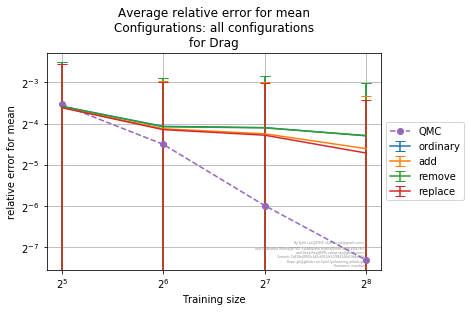

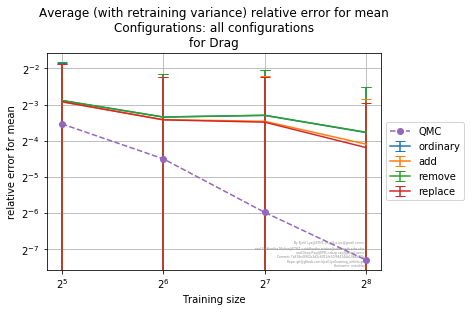

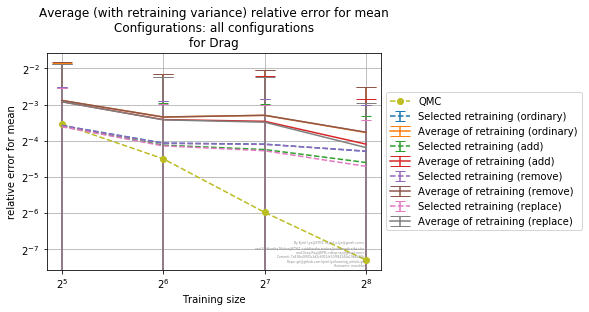

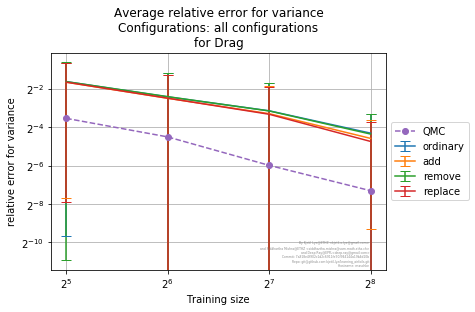

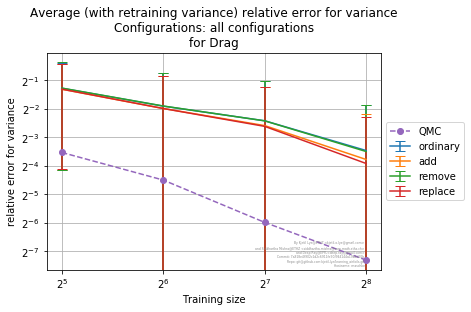

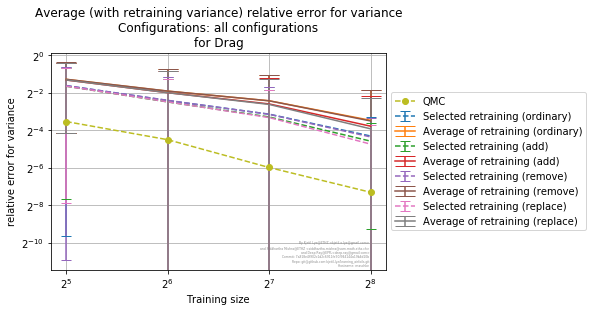

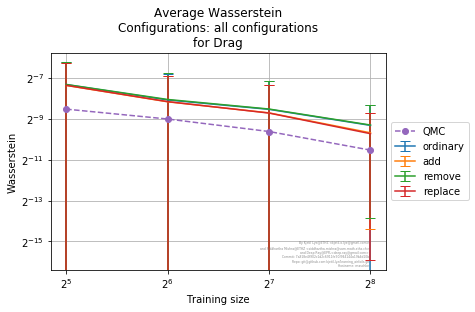

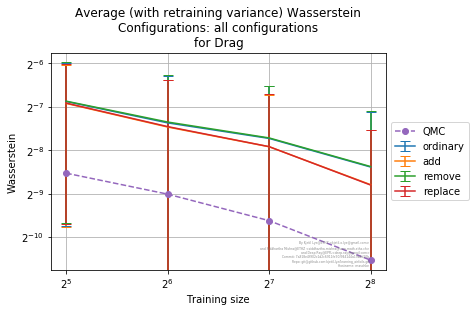

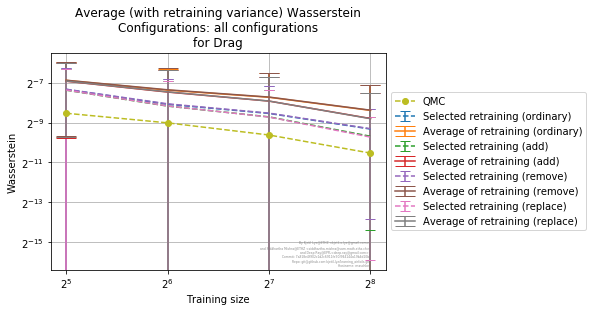

/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive valu

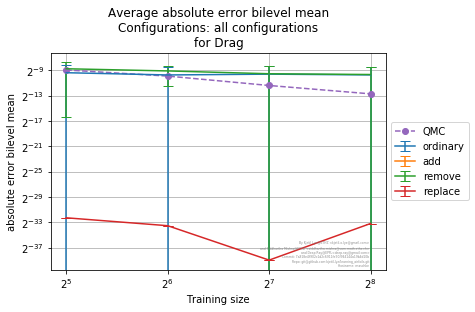

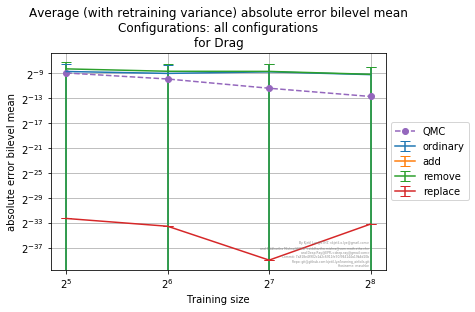

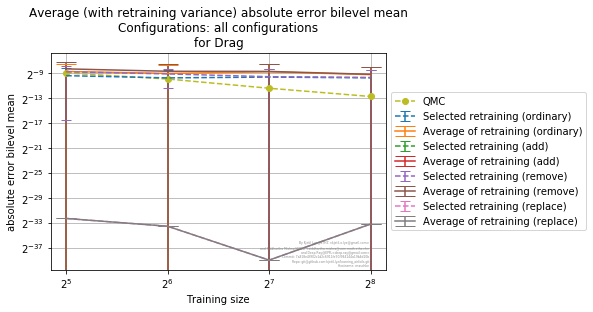

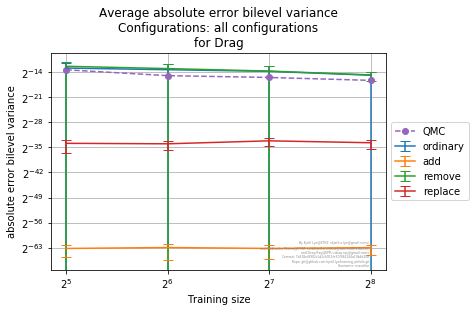

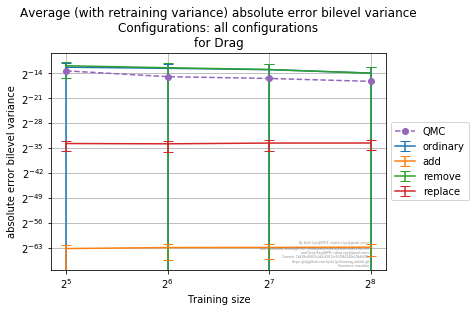

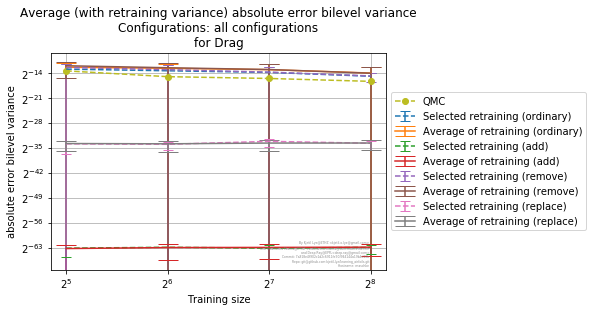

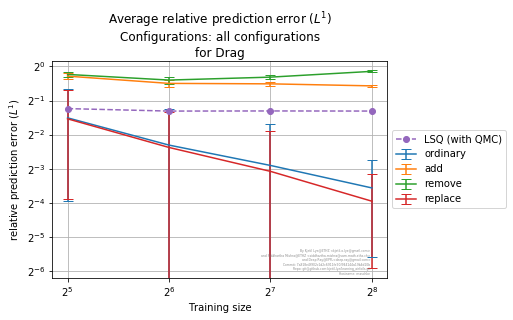

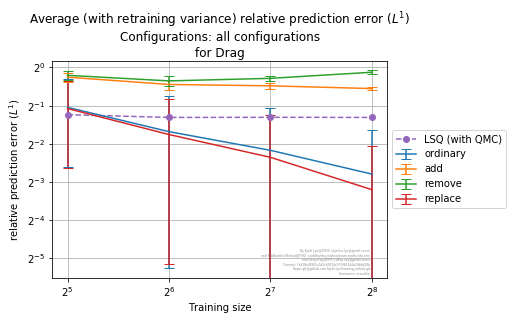

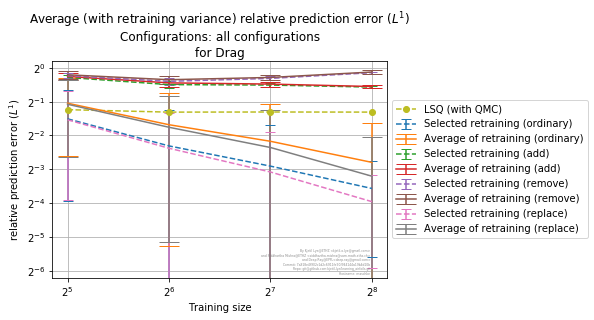

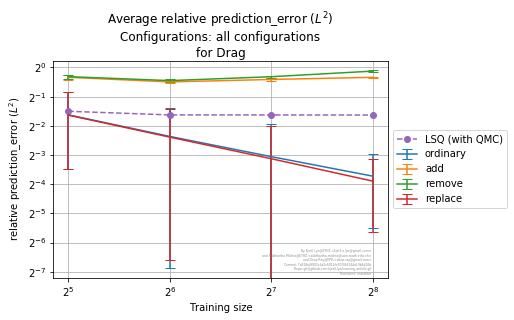

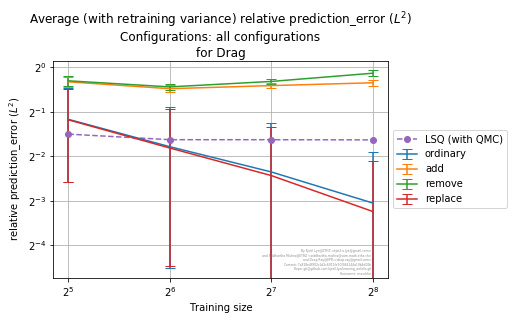

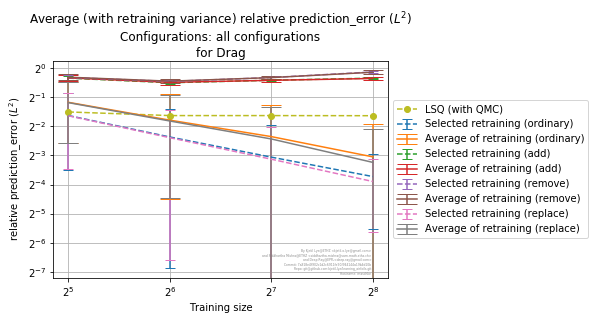

1015
320
[64, 128, 256, 32]


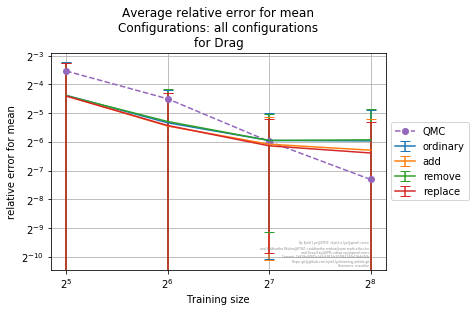

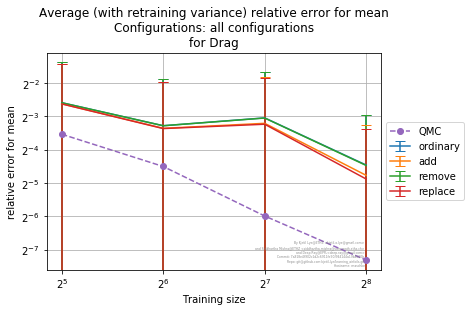

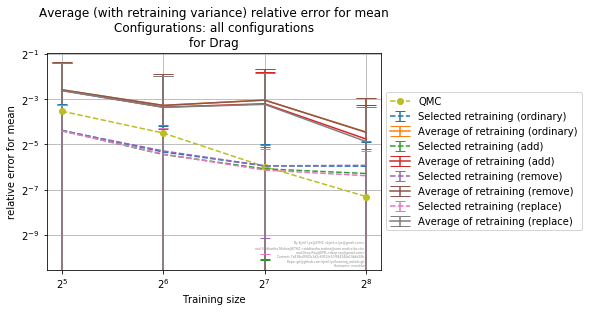

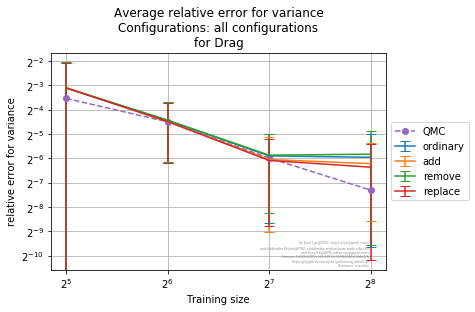

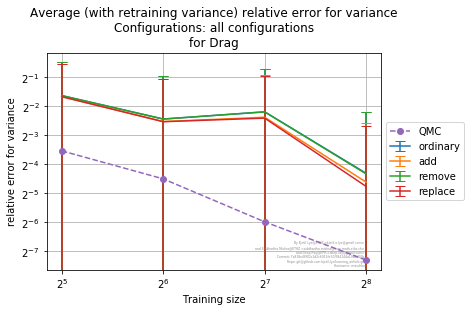

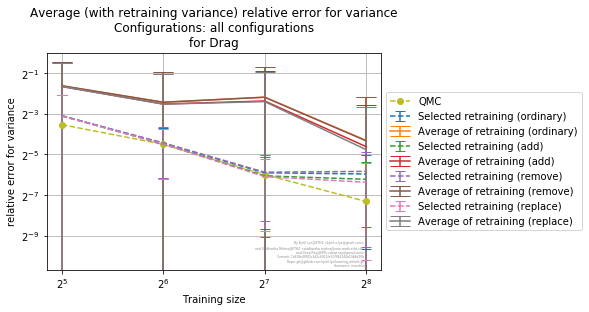

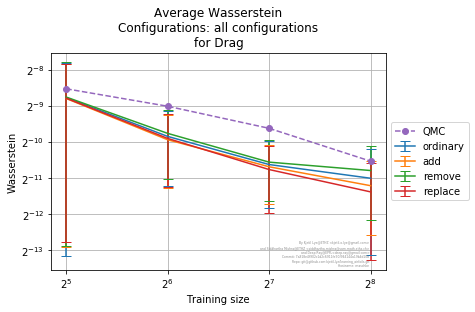

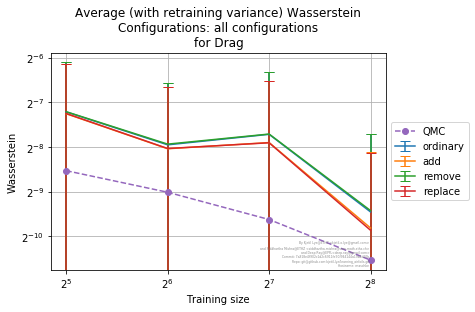

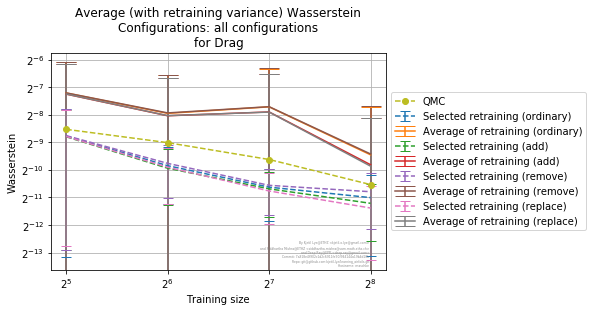

/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/u/klye/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive valu

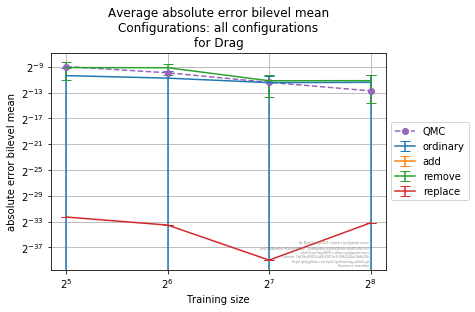

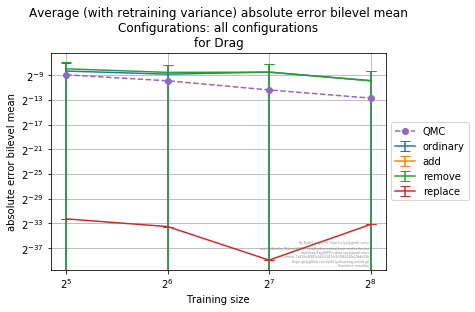

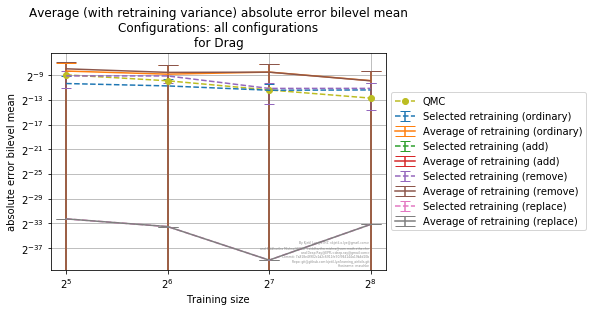

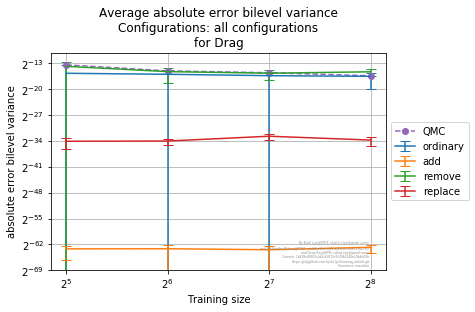

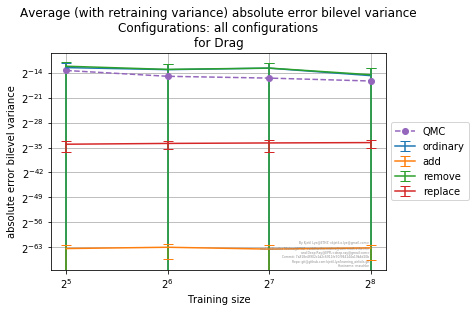

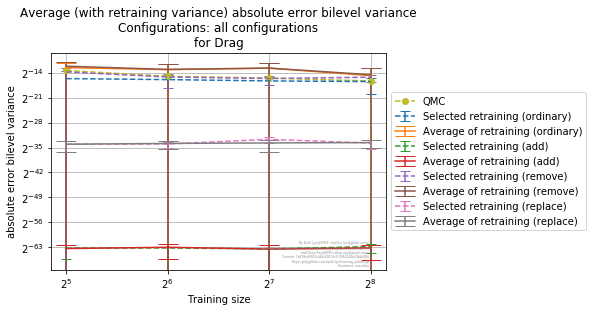

In [ ]:
for functional in functionals:
    display(HTML("<h1>{}</h1>".format(functional)))
    for filtername in filters:
        display(HTML("<h2>{}</h2>".format(filtername)))
        plot_as_training_size(functional, filter_configs(data[functional], test_functions=[filters[filtername]]))